In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import openpyxl


In [45]:
file_path1 = 'dataset/Descriptif_patients.xlsx'
file_global = 'dataset/radiomiques_global_cleaned.xlsx'
file_path3 = 'dataset/radiomiques_multislice_cleaned.xlsx'


# Liste des chemins de vos fichiers Excel
df_global = pd.read_excel(file_global, engine='openpyxl')

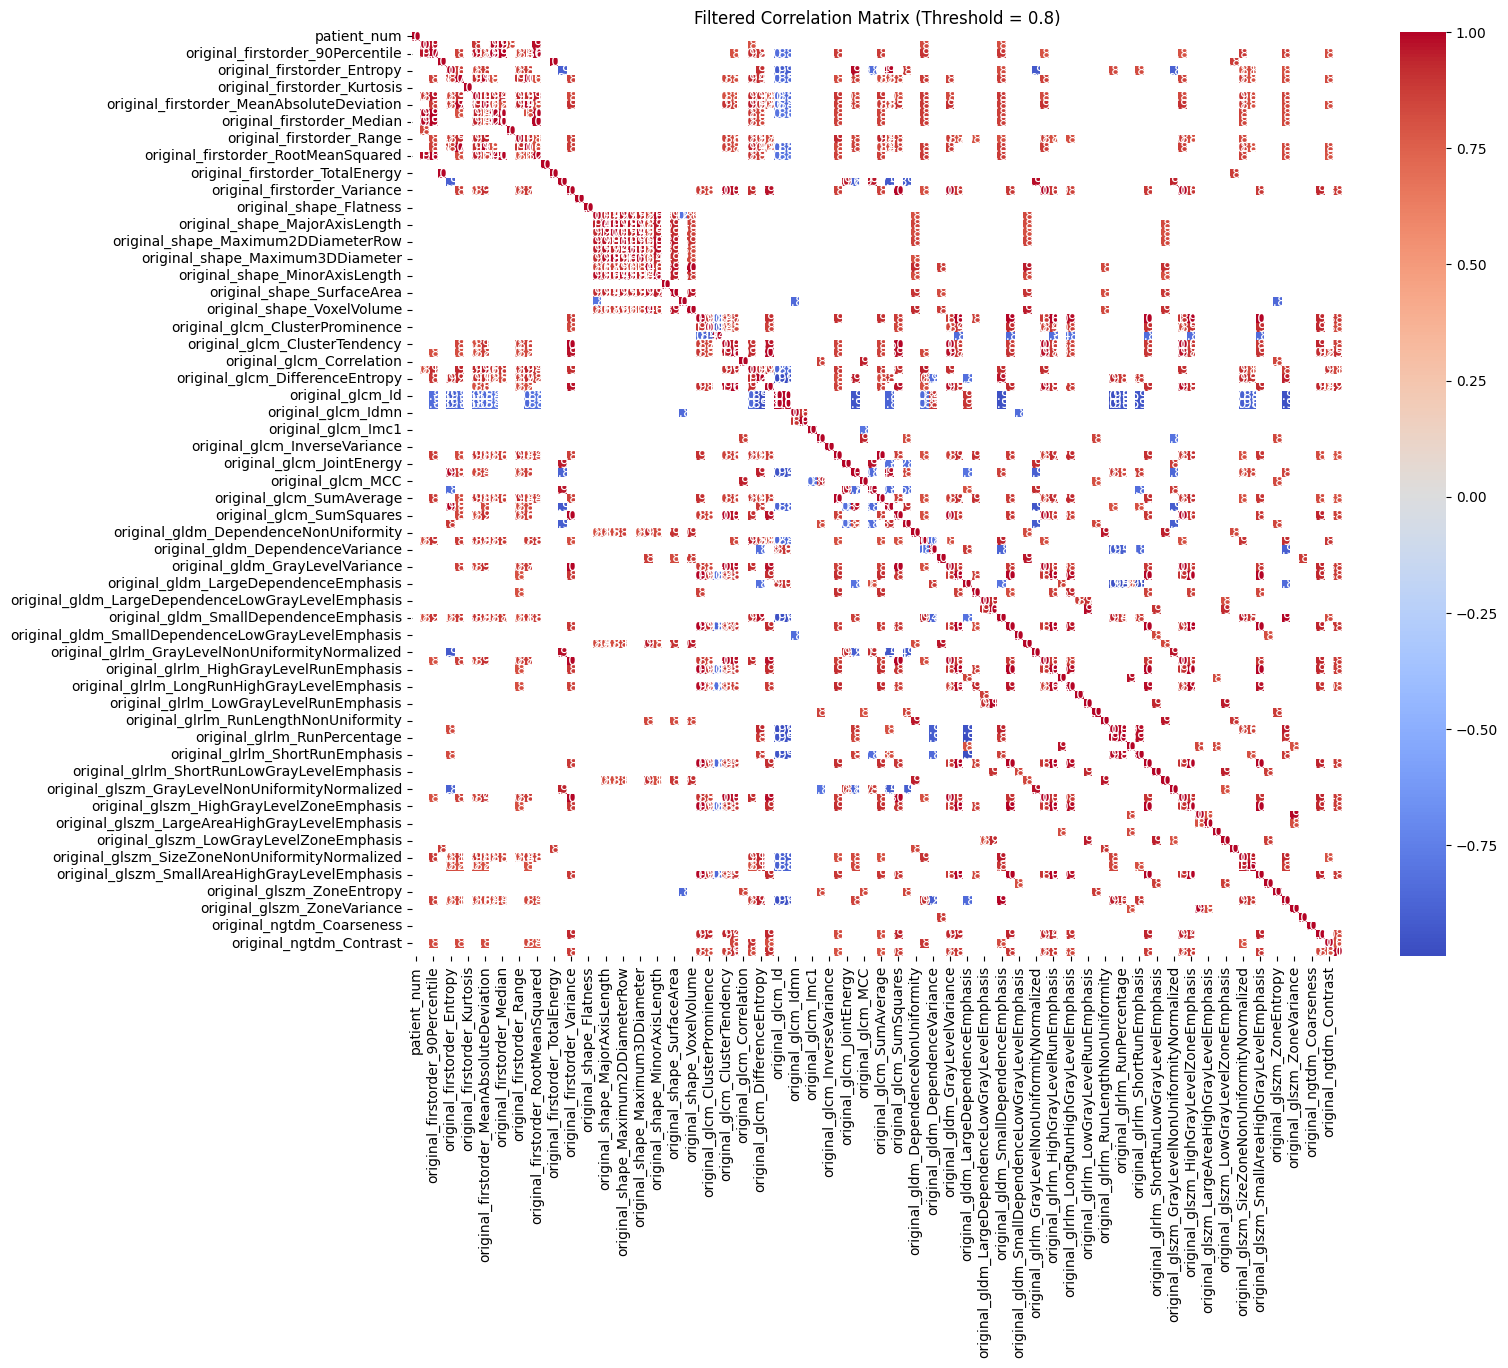

/opt/homebrew/Caskroom/miniforge/base/envs/env_python_ete3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 2000x1600 with 0 Axes>

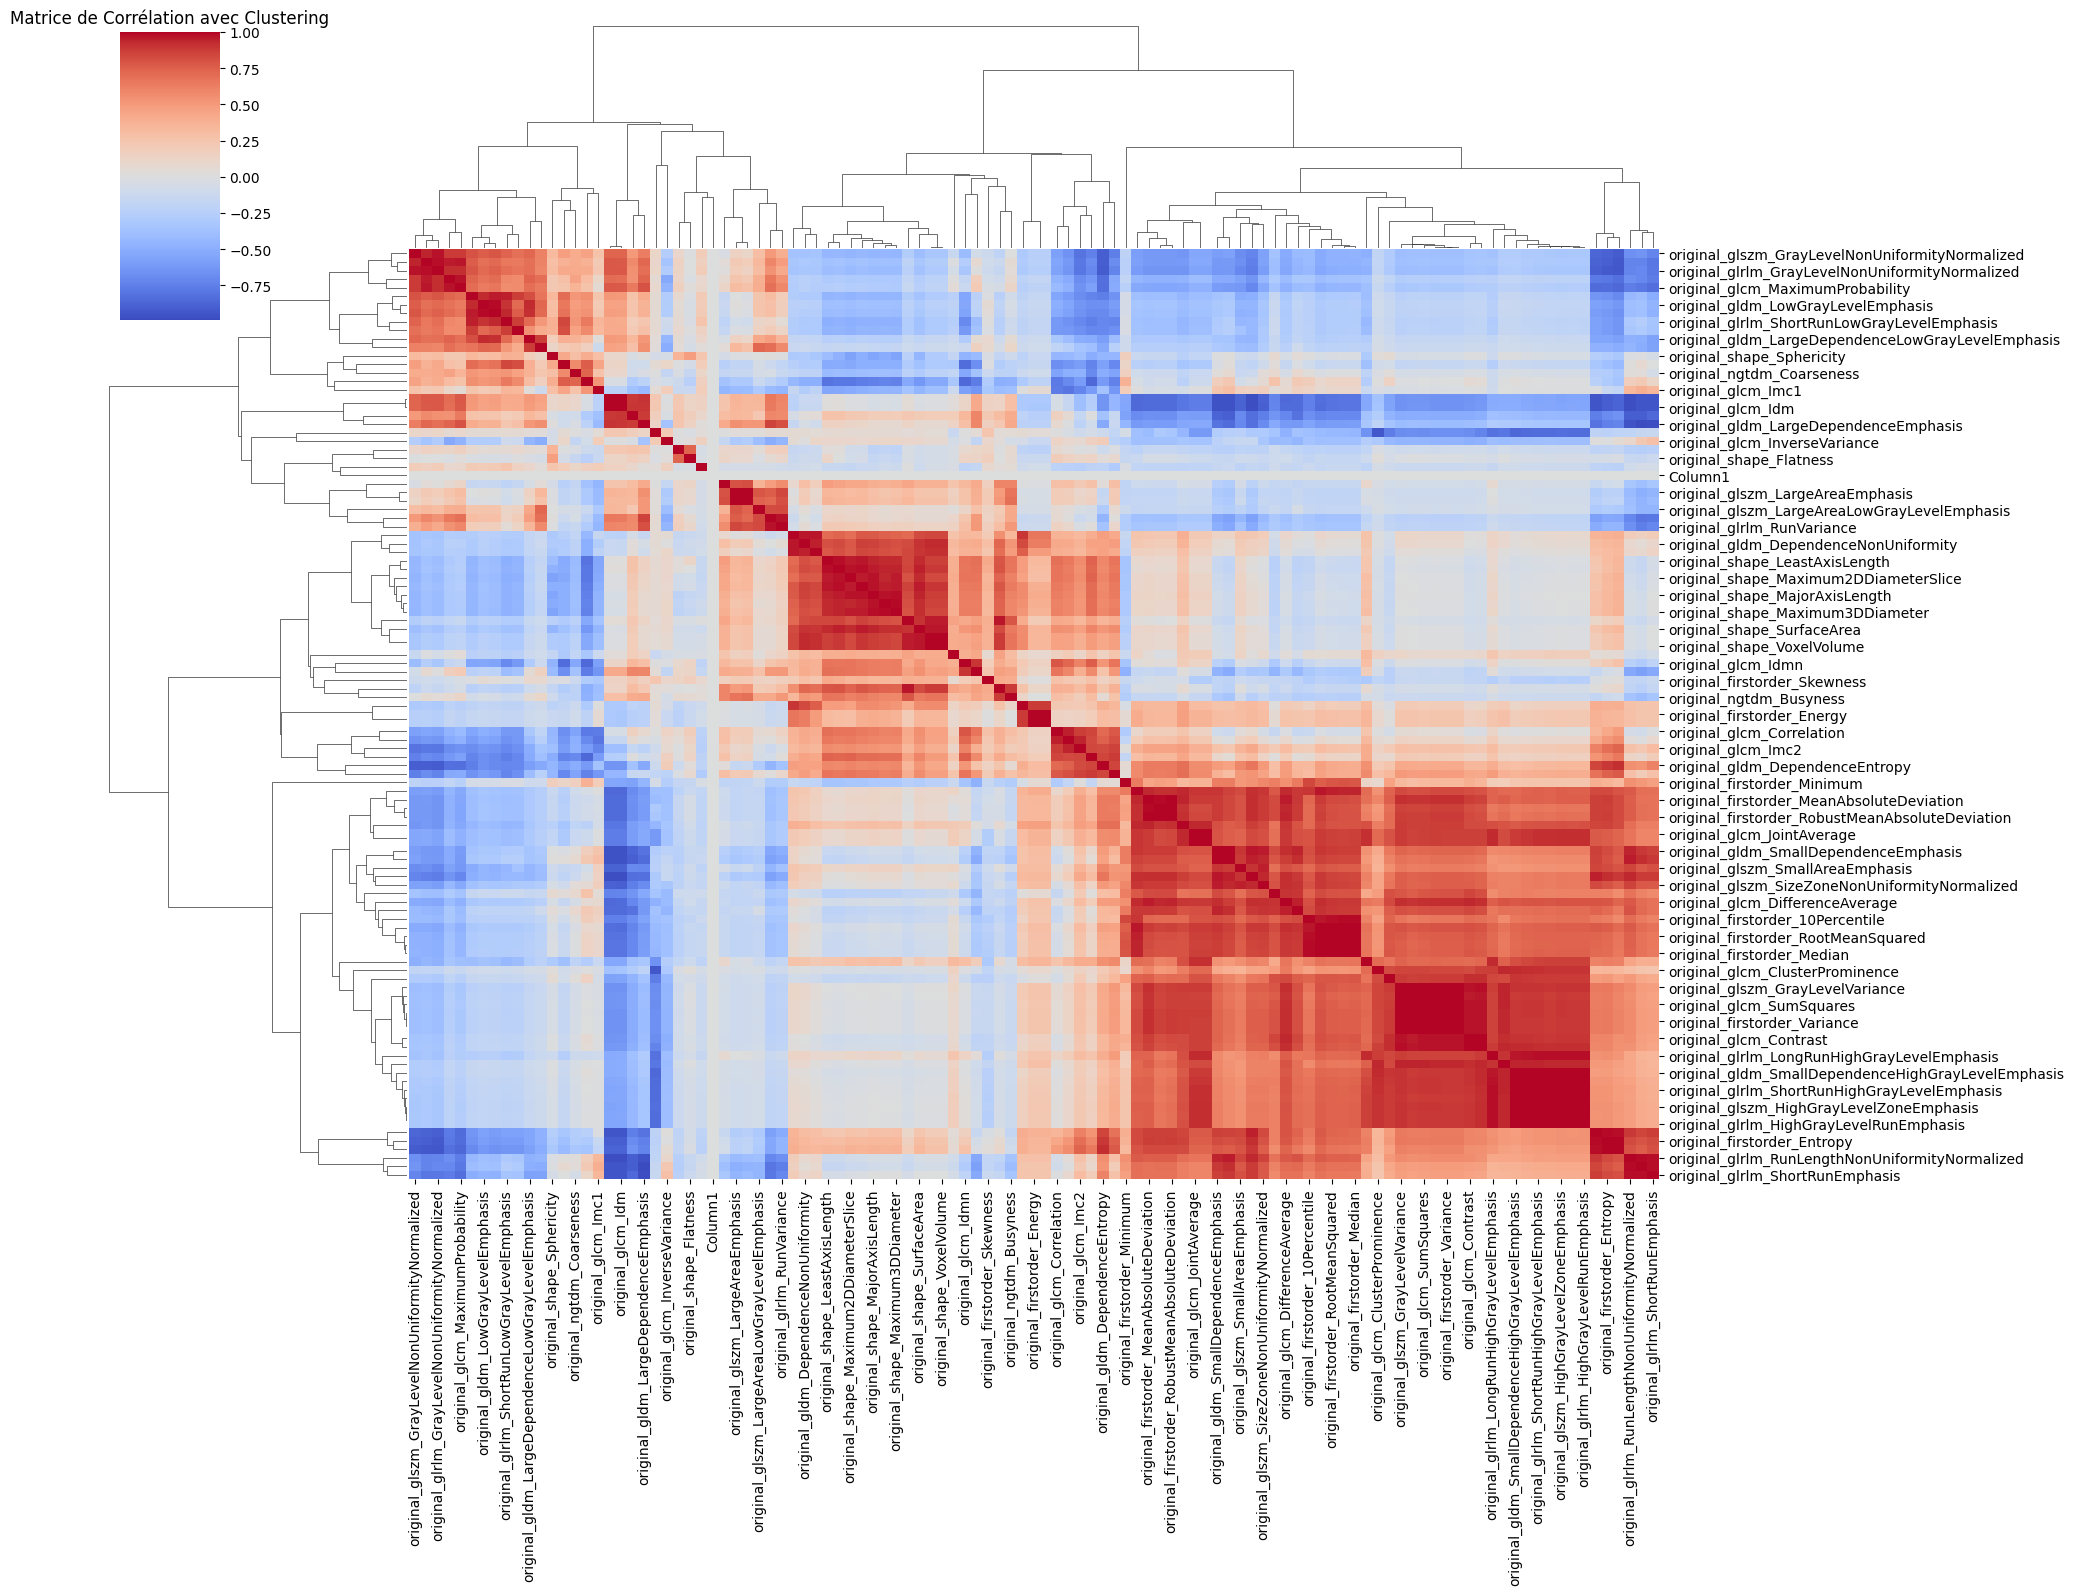

In [46]:
df_numeric = df_global.select_dtypes(include=[float, int])
correlation_matrix = df_numeric.corr()

# Replace NaN and infinite values with zeros
correlation_matrix = correlation_matrix.replace([np.inf, -np.inf], np.nan).fillna(0)

# Filter to display only correlations above a certain threshold
threshold = 0.8
high_corr_var = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]
filtered_corr_matrix = high_corr_var.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Plot the filtered heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(filtered_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Filtered Correlation Matrix (Threshold = 0.8)')
plt.show()

# Plot the clustered heatmap
plt.figure(figsize=(20, 16))
sns.clustermap(correlation_matrix, annot=False, cmap='coolwarm', figsize=(20, 16))
plt.title('Matrice de Corrélation avec Clustering')
plt.show()

In [47]:




# Select only numeric columns
df_numeric = df_global.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Replace NaNs and infinite values with zeros
correlation_matrix = correlation_matrix.replace([np.inf, -np.inf], np.nan).fillna(0)

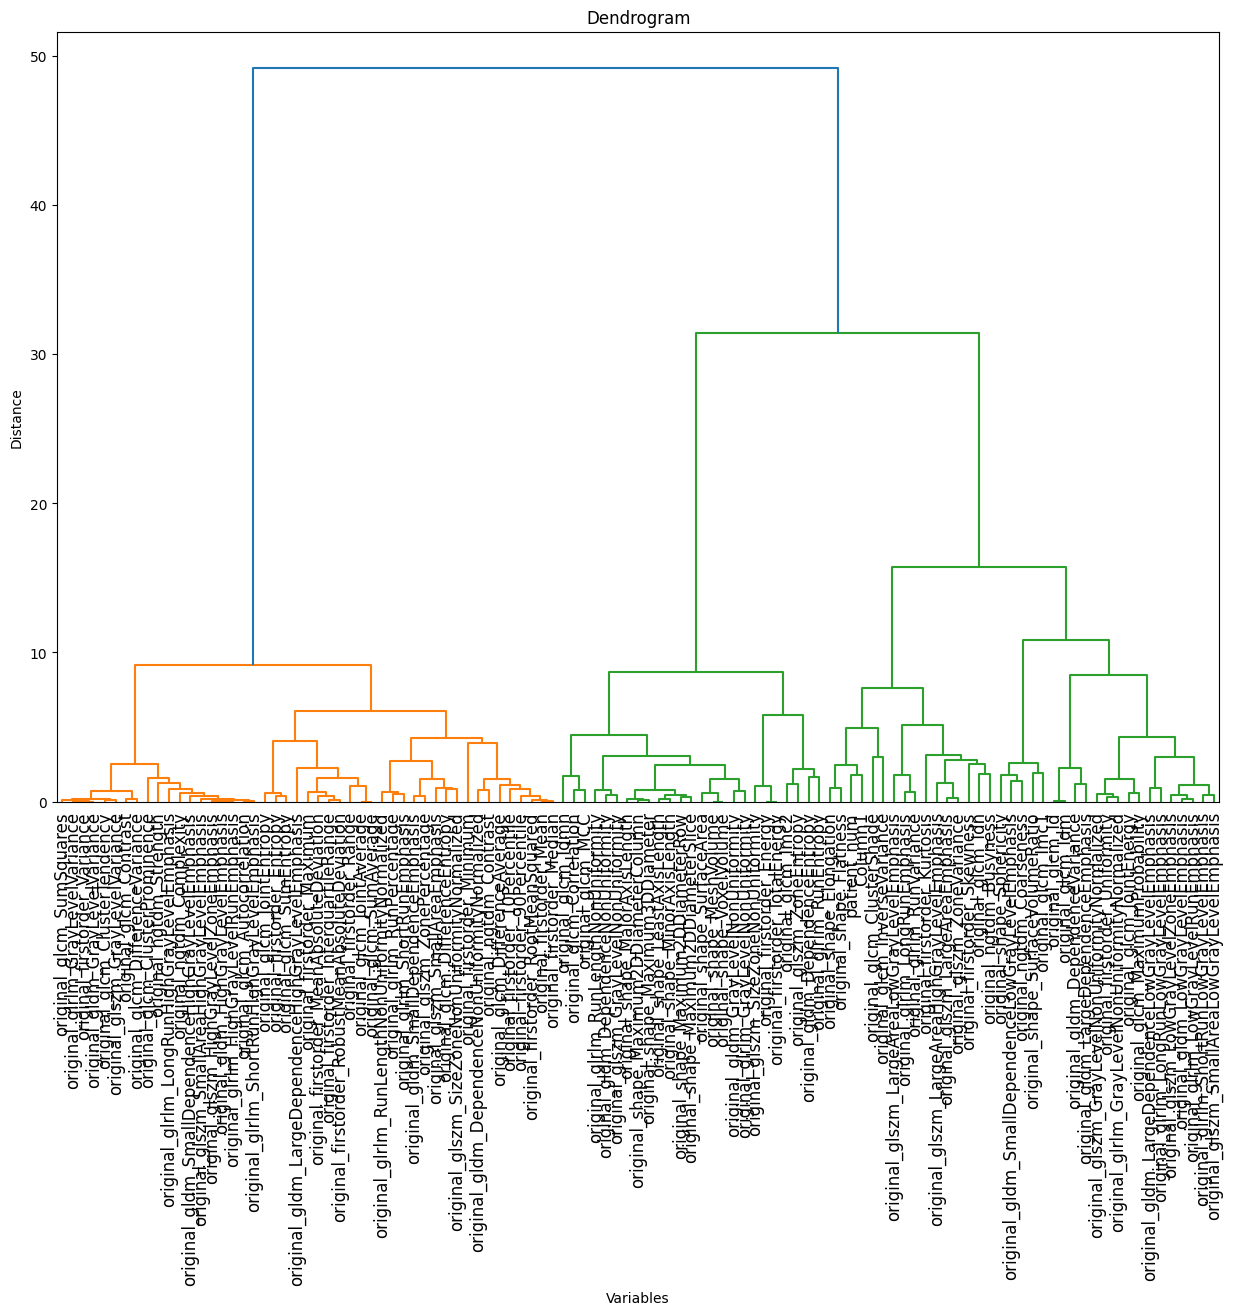

In [48]:
# Perform hierarchical clustering
Z = linkage(correlation_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=correlation_matrix.columns, leaf_rotation=90, leaf_font_size=12)
plt.title('Dendrogram')
plt.xlabel('Variables')
plt.ylabel('Distance')
plt.show()

In [49]:
# Choose a value for max_d
max_d = 8 # Adjust this value based on the dendrogram plot

# Form clusters by cutting the dendrogram at the chosen height
clusters = fcluster(Z, max_d, criterion='distance')

# Create a dictionary to hold the clusters
cluster_dict = {}
for idx, cluster_id in enumerate(clusters):
    variable = correlation_matrix.columns[idx]
    if cluster_id not in cluster_dict:
        cluster_dict[cluster_id] = []
    cluster_dict[cluster_id].append(variable)

# Print the clusters
for cluster_id, variables in cluster_dict.items():
    print(f'Cluster {cluster_id}: {variables}')

Cluster 5: ['patient_num', 'original_firstorder_Kurtosis', 'original_firstorder_Skewness', 'Column1', 'original_shape_Elongation', 'original_shape_Flatness', 'original_glcm_ClusterShade', 'original_glcm_Idn', 'original_glcm_InverseVariance', 'original_glrlm_LongRunEmphasis', 'original_glrlm_RunVariance', 'original_glszm_LargeAreaEmphasis', 'original_glszm_LargeAreaHighGrayLevelEmphasis', 'original_glszm_LargeAreaLowGrayLevelEmphasis', 'original_glszm_ZoneVariance', 'original_ngtdm_Busyness']
Cluster 2: ['original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Entropy', 'original_firstorder_InterquartileRange', 'original_firstorder_Maximum', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean', 'original_firstorder_Median', 'original_firstorder_Minimum', 'original_firstorder_Range', 'original_firstorder_RobustMeanAbsoluteDeviation', 'original_firstorder_RootMeanSquared', 'original_glcm_DifferenceAverage', 'original_glcm_DifferenceEn

PCA results for Cluster 5:
        PC1       PC2
0 -0.028722 -1.284042
1 -0.032075 -1.180498
2 -0.106109 -1.278597
3 -0.732022 -1.174392
4 -0.252837  1.933353


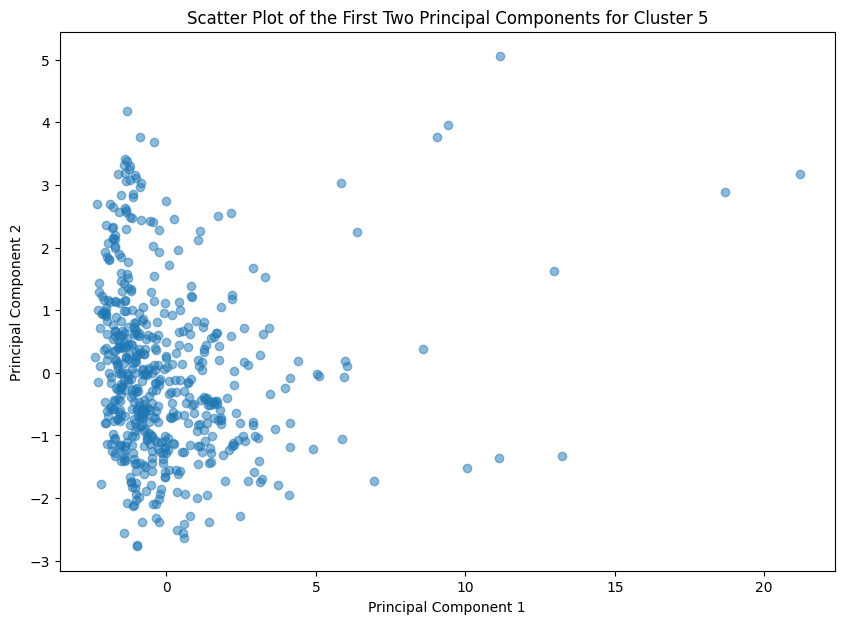

PCA results for Cluster 2:
        PC1       PC2
0 -0.707346 -0.347191
1 -1.418255 -0.100745
2 -1.323574 -0.054243
3  1.231537 -1.383190
4 -3.583349  1.989251


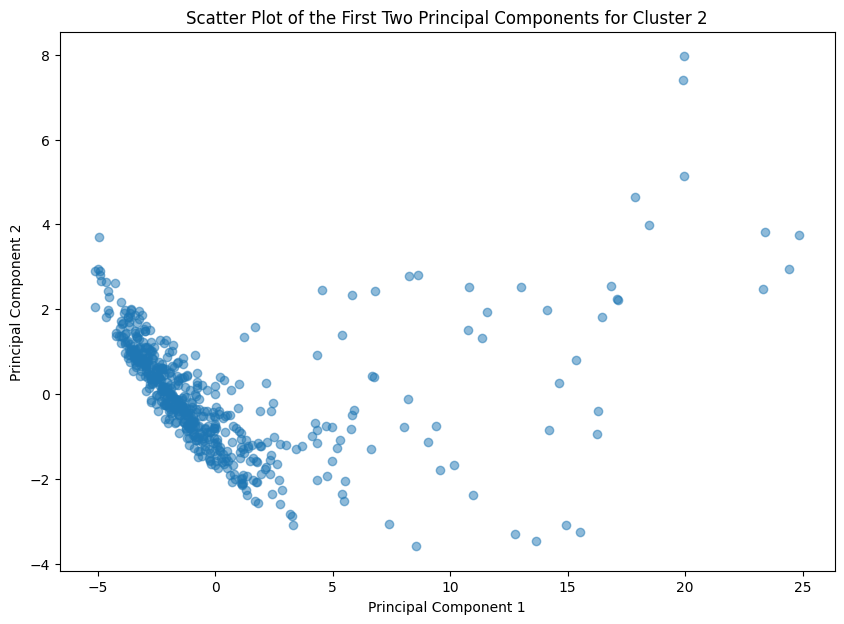

PCA results for Cluster 4:
        PC1       PC2
0  1.624810 -1.550402
1  1.261453 -1.347489
2  1.192874 -1.286602
3  2.265221 -1.895024
4 -4.822307  2.861715


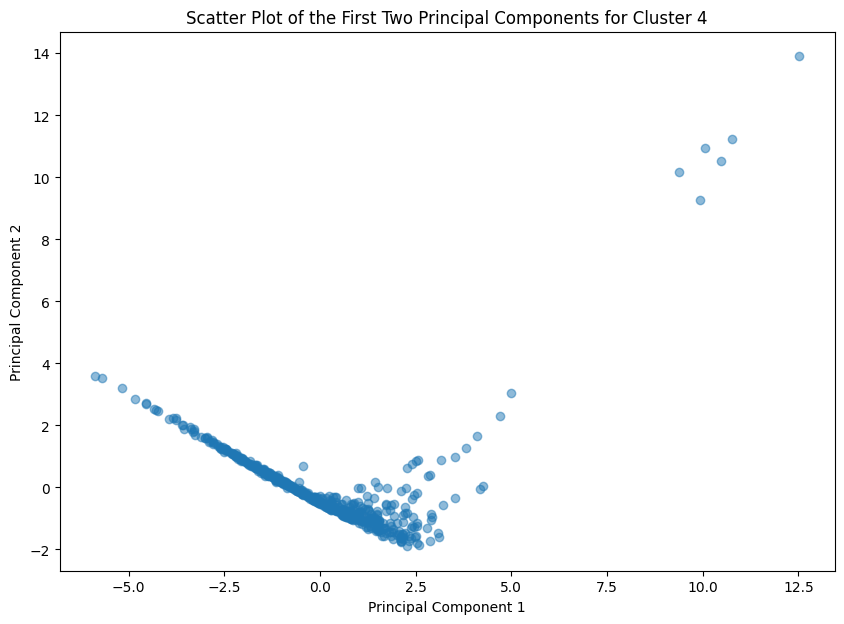

PCA results for Cluster 8:
        PC1       PC2
0 -1.232601  0.470159
1 -1.062808  0.237362
2 -0.929151  0.462613
3 -2.461435  0.666118
4  8.688778 -1.774567


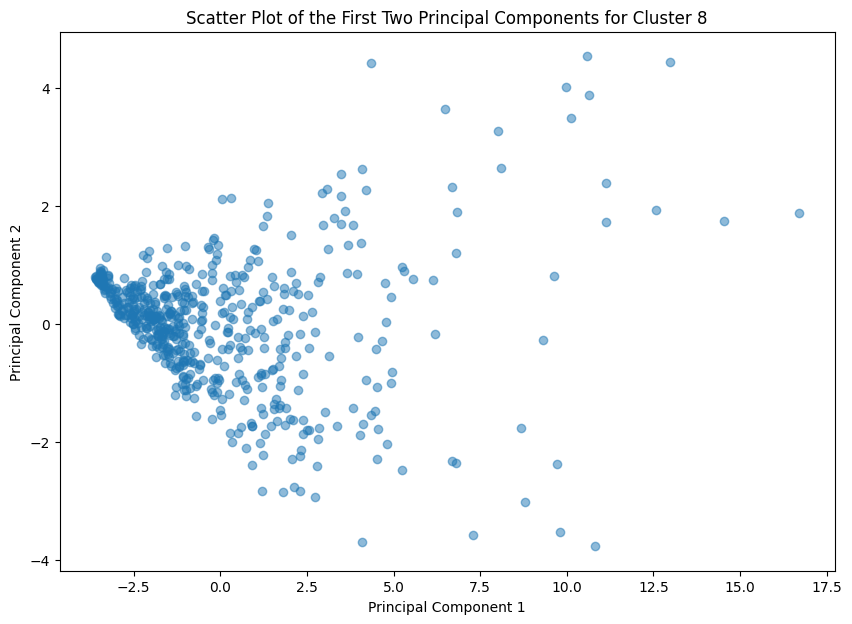

PCA results for Cluster 1:
        PC1       PC2
0 -0.679786  0.154676
1 -0.854960  0.017415
2 -0.861622  0.022578
3 -0.143507  0.431532
4 -1.089480 -0.078667


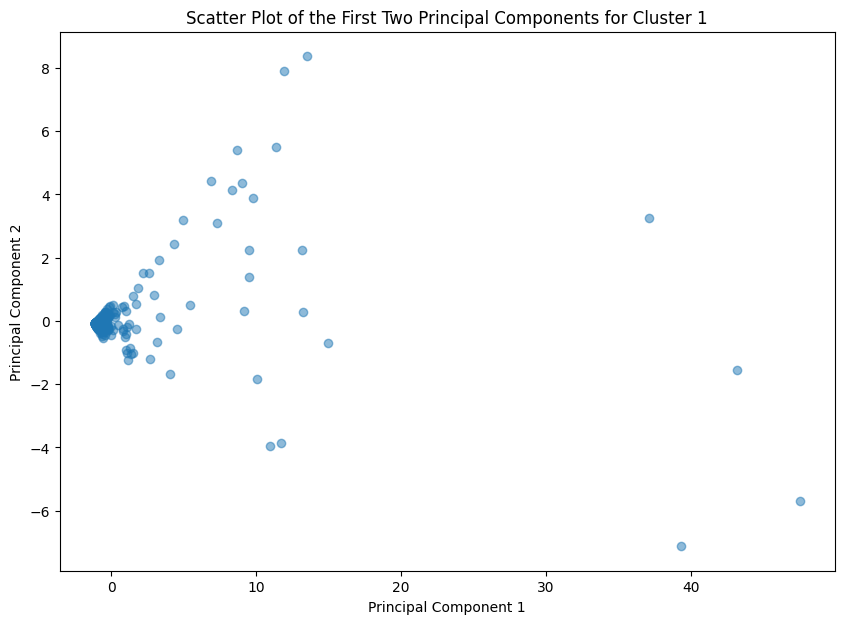

PCA results for Cluster 3:
        PC1       PC2
0 -0.162188 -2.433497
1 -0.198157 -2.239584
2 -0.356411 -2.050665
3 -0.077056 -2.489492
4 -4.095622  3.084666


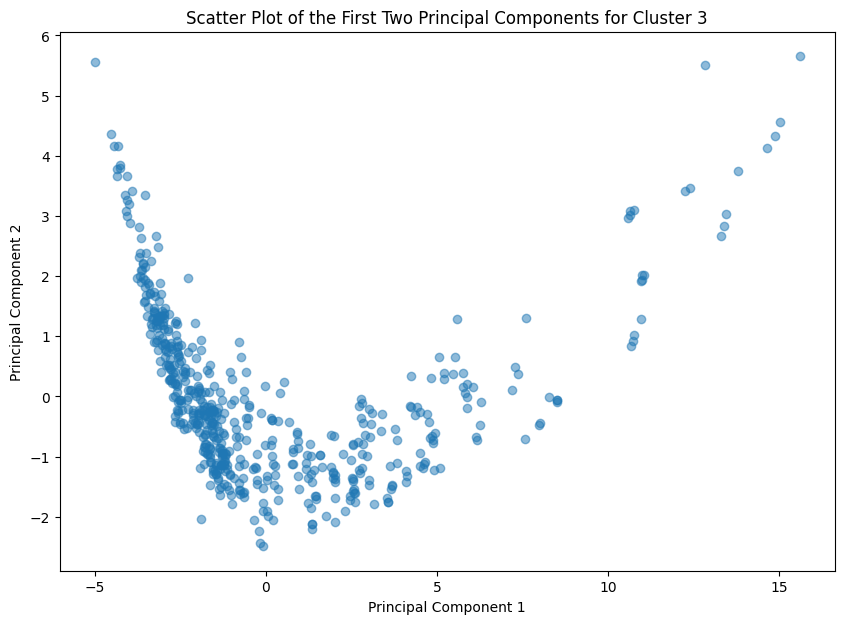

PCA results for Cluster 6:
        PC1       PC2
0 -1.527323  1.158595
1 -1.349971  0.694396
2 -1.254594  0.773989
3 -1.449277  0.901997
4  8.655620  5.873979


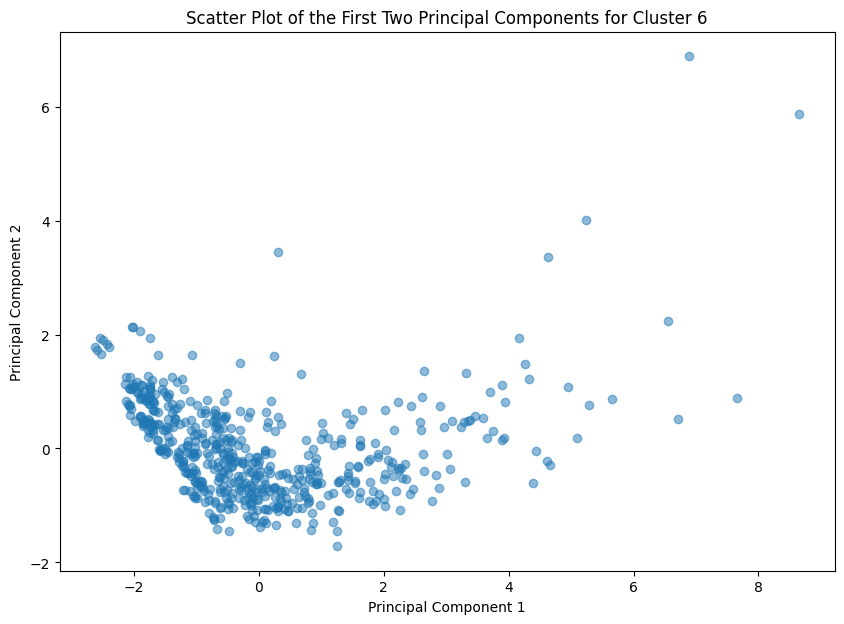

PCA results for Cluster 7:
        PC1       PC2
0 -0.603630  0.082206
1 -0.578904 -0.176287
2 -0.719488  0.058831
3  0.598210 -0.095146
4 -2.439464 -0.247631


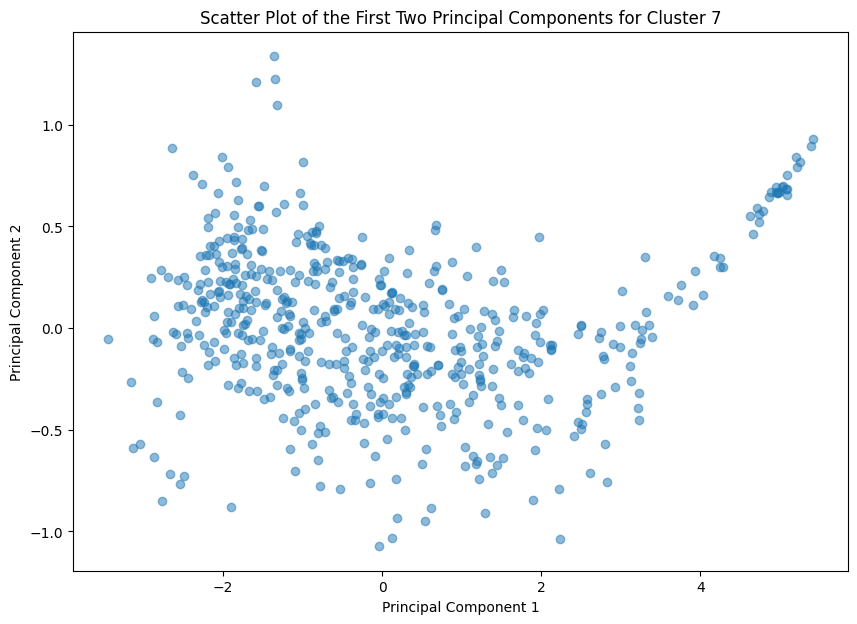

In [50]:


# Function to apply PCA to a cluster of variables
def apply_pca_to_cluster(df, cluster_variables):
    if len(cluster_variables) < 2:
        print(f"Cluster {cluster_variables} has less than 2 variables, skipping PCA.")
        return None
    
    # Select the cluster variables
    cluster_data = df[cluster_variables]
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(cluster_data)
    
    # Apply PCA
    pca = PCA(n_components=2)  # Retain only the first 2 components for visualization
    principal_components = pca.fit_transform(scaled_data)
    
    # Convert PCA results to a DataFrame
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    
    return pca_df

# Apply PCA to each cluster and store the results in a dictionary
pca_results = {}
for cluster_id, variables in cluster_dict.items():
    pca_df = apply_pca_to_cluster(df_numeric, variables)
    if pca_df is not None:
        pca_results[cluster_id] = pca_df
        print(f'PCA results for Cluster {cluster_id}:')
        print(pca_df.head())
        
        # Visualize the PCA results
        plt.figure(figsize=(10, 7))
        plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
        plt.title(f'Scatter Plot of the First Two Principal Components for Cluster {cluster_id}')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.show()
        
pca_combined = pd.concat(pca_results.values(), axis=1)

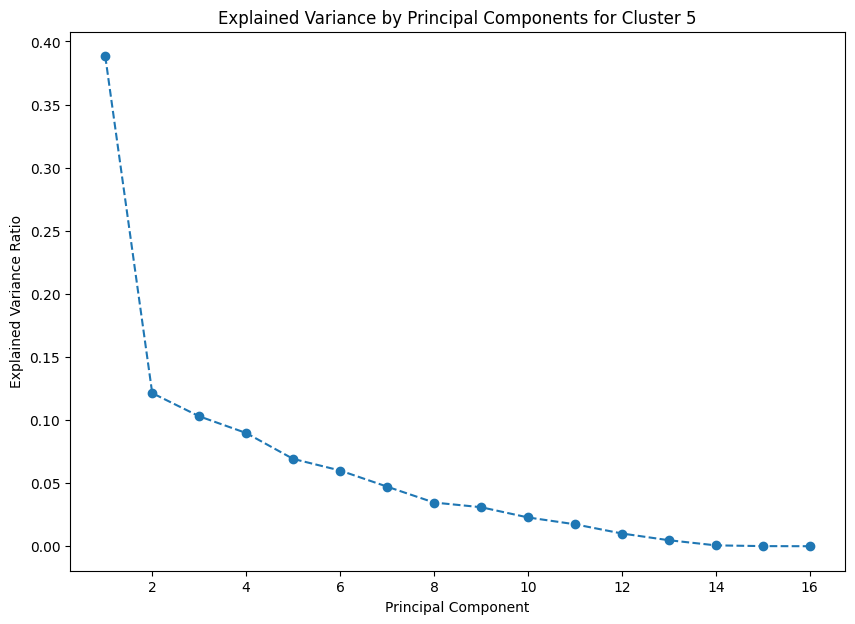

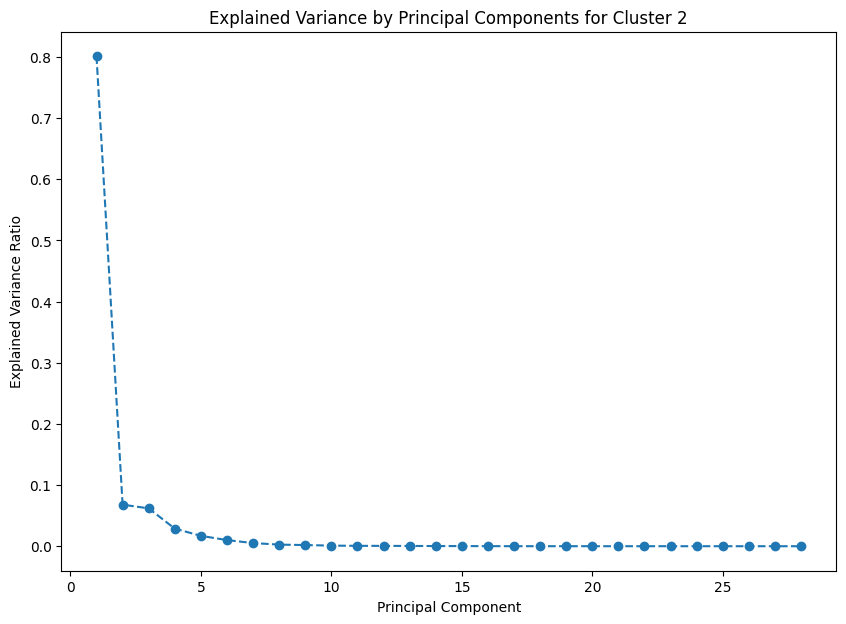

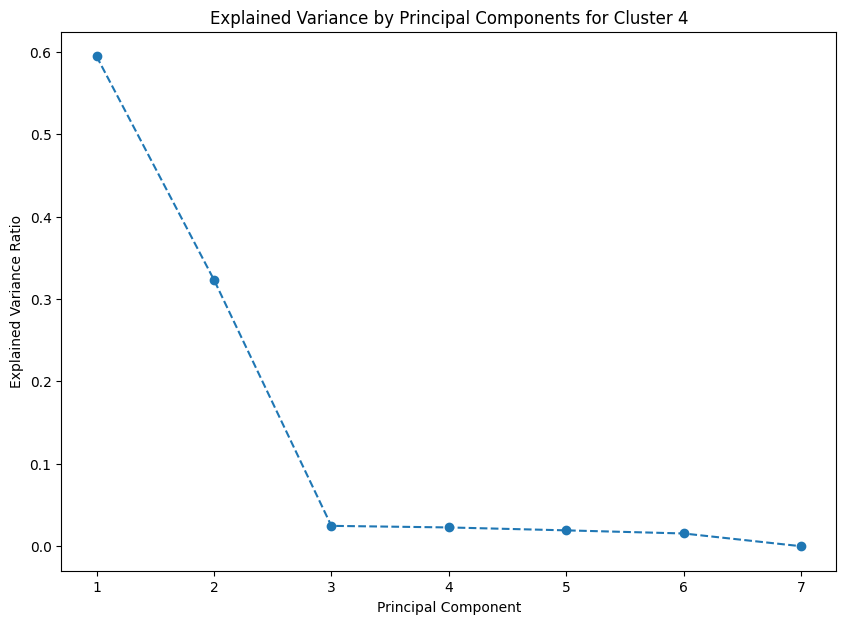

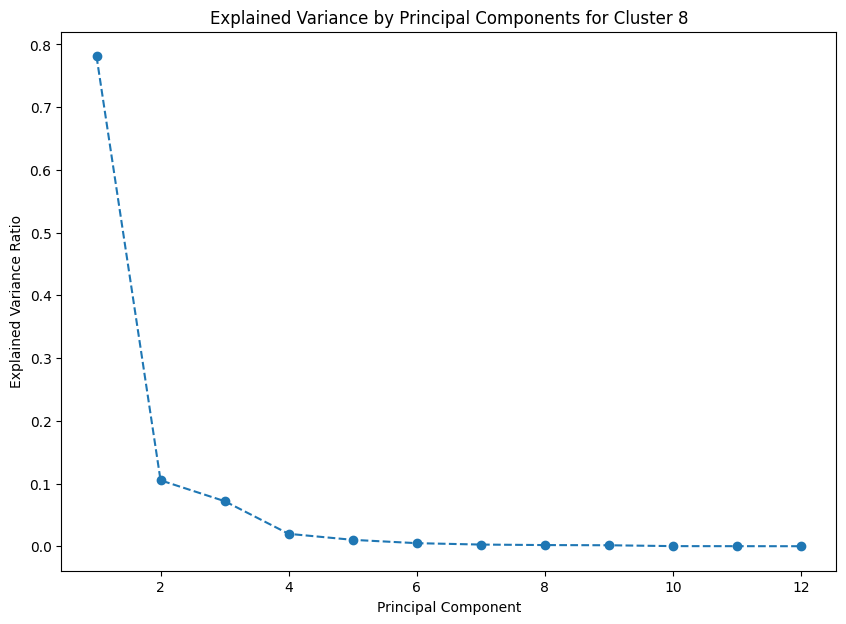

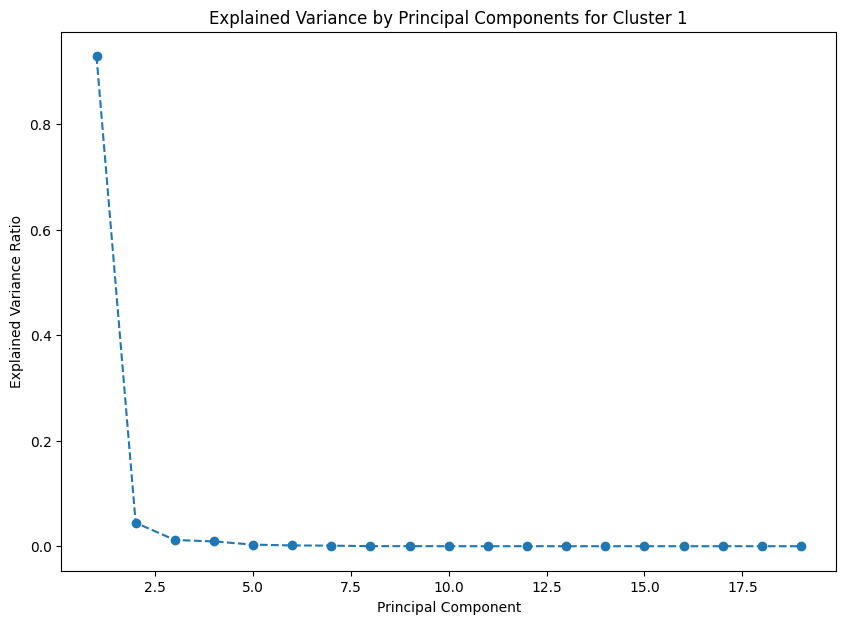

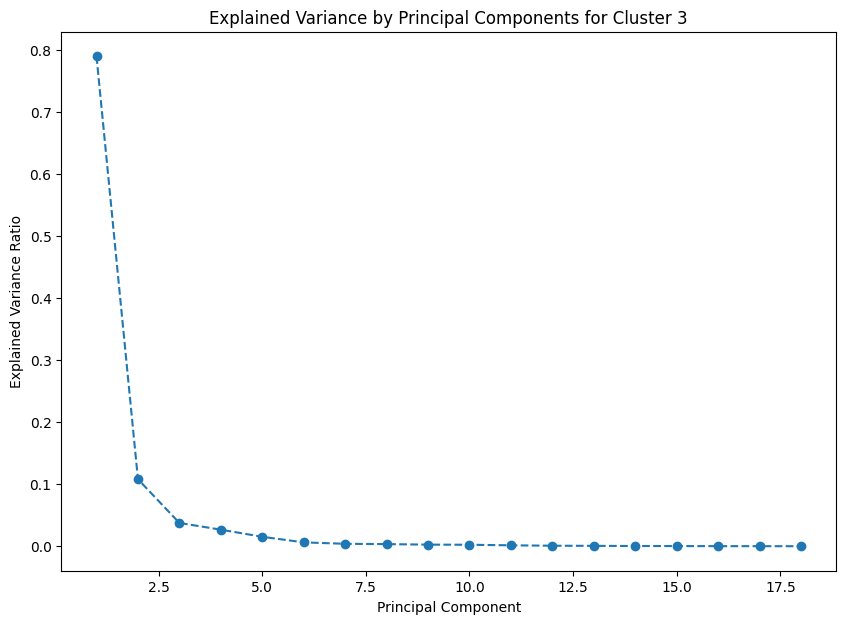

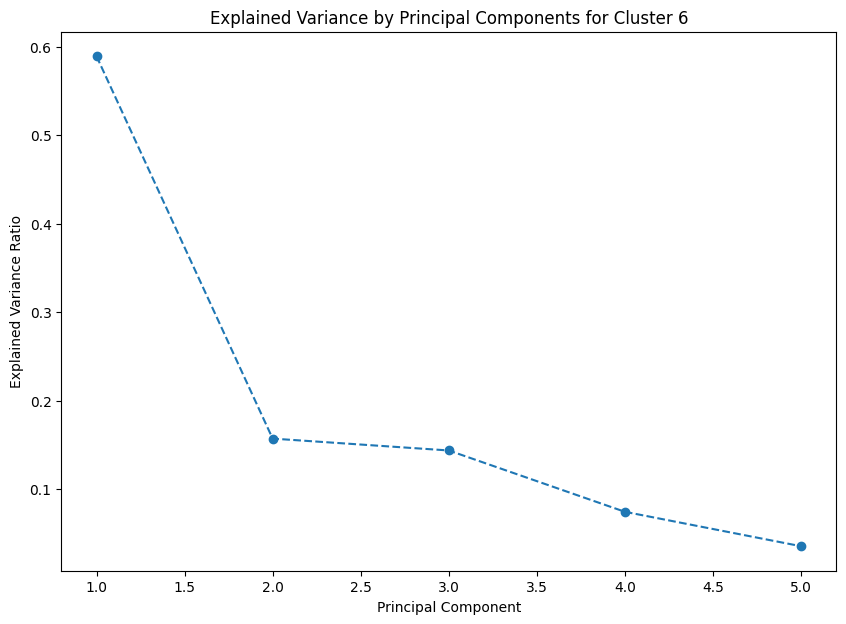

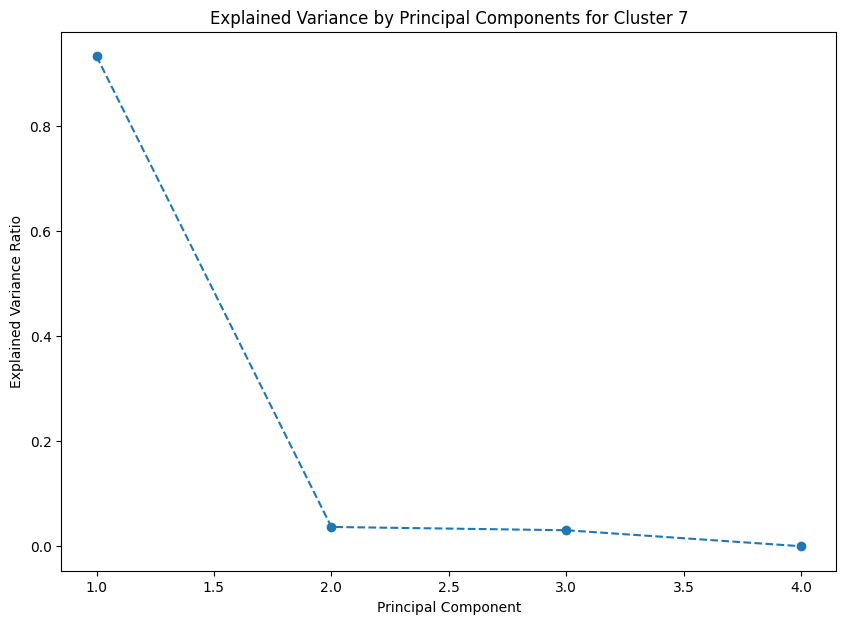

In [51]:
for cluster_id, pca_df in pca_results.items():
    # Perform PCA again to get the explained variance (assuming scaled data was used)
    cluster_variables = cluster_dict[cluster_id]
    cluster_data = df_numeric[cluster_variables]
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(cluster_data)
    pca = PCA().fit(scaled_data)
    
    # Plot explained variance
    plt.figure(figsize=(10, 7))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
    plt.title(f'Explained Variance by Principal Components for Cluster {cluster_id}')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.show()

In [52]:
# Combine PCA results with the target column


target = df_global.iloc[:, 0]
pca_combined['target'] = target.values

# Split the data
X = pca_combined.drop(columns=['target'])
y = pca_combined['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.64


In [53]:


# List of classifiers with multi-class strategy specified where needed
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='ovr'),
    "Support Vector Machine": SVC(probability=True, decision_function_shape='ovr'),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Function to evaluate and compare classifiers
def evaluate_classifiers(X_train, X_test, y_train, y_test, classifiers):
    results = {}
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # Check if the classifier supports predict_proba
        if hasattr(clf, "predict_proba"):
            y_proba = clf.predict_proba(X_test)
            if len(y_proba.shape) > 1 and y_proba.shape[1] > 1:  # Multi-class case
                roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
            else:  # Binary classification case
                roc_auc = roc_auc_score(y_test, y_proba[:, 1])
        else:
            roc_auc = None
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC AUC": roc_auc
        }
    
    return pd.DataFrame(results).T

# Split the data
X = pca_combined.drop(columns=['target'])
y = pca_combined['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate and compare classifiers
results = evaluate_classifiers(X_train, X_test, y_train, y_test, classifiers)
print(results)

                        Accuracy  Precision    Recall  F1 Score   ROC AUC
Random Forest           0.636364   0.659956  0.636364  0.601432  0.834900
Logistic Regression     0.518182   0.473684  0.518182  0.444869  0.655824
Support Vector Machine  0.500000   0.379654  0.500000  0.363068  0.741900
k-Nearest Neighbors     0.654545   0.650000  0.654545  0.643825  0.822501
Gradient Boosting       0.618182   0.616061  0.618182  0.595208  0.805171
Neural Network          0.700000   0.691461  0.700000  0.689998  0.810113


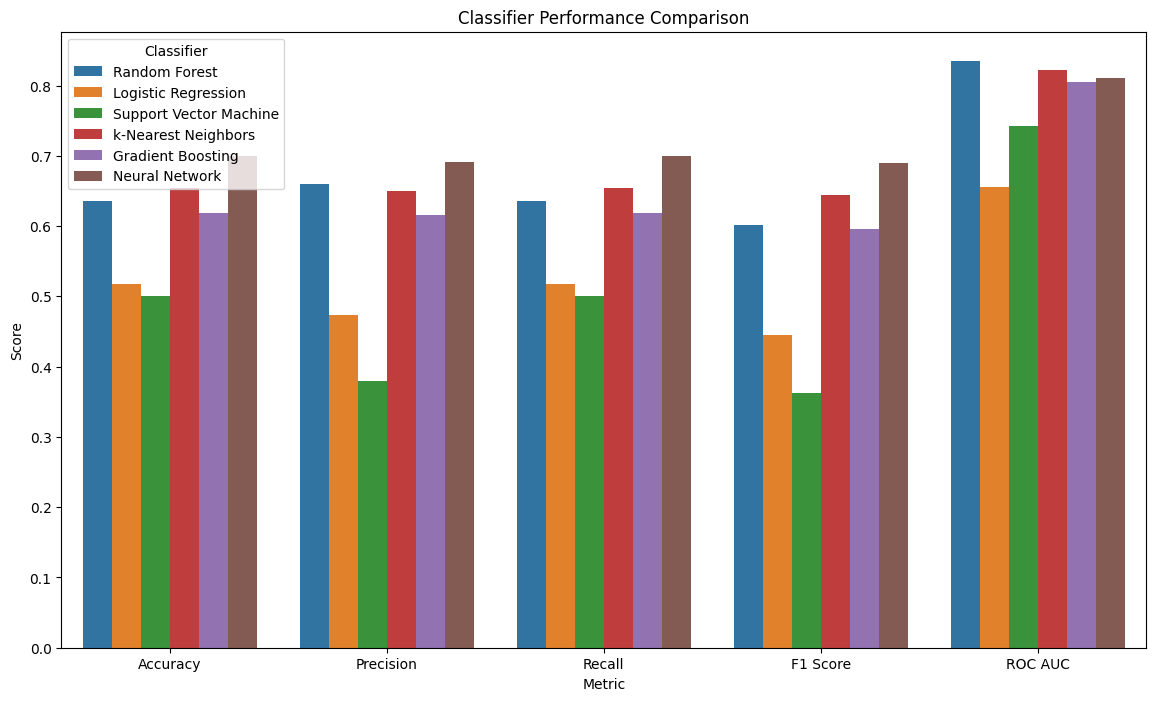

In [54]:
# Visualize the results
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
results_plot = results[metrics].reset_index().melt(id_vars="index", var_name="Metric", value_name="Score")
plt.figure(figsize=(14, 8))
sns.barplot(x="Metric", y="Score", hue="index", data=results_plot)
plt.title("Classifier Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.legend(title="Classifier")
plt.show()